<a href="https://colab.research.google.com/github/Akhorramrouz/My-body-Your-choice/blob/main/entailment_data_investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [34]:
%cd "/content/drive/MyDrive/My-body-Your-choice/data/entailment_labled_GPT"

/content/drive/MyDrive/My-body-Your-choice/data/entailment_labled_GPT


In [35]:
dfs = []
for file_name in os.listdir():
    if file_name.endswith(".csv"):
        # print(file_name)
        dfs.append(pd.read_csv(file_name,index_col=0))

data = pd.concat(dfs)

In [36]:
print(len(data))
data_unique = data.drop_duplicates()
print(len(data))

4910
4910


In [37]:
data2 = pd.read_csv("Copy of topics_with_keyword_abortion(سقط)_entailment_199_hyp_prem_changed.csv",index_col=0)

In [38]:
data = pd.concat([data,data2]).drop_duplicates()
print(len(data))

4910


In [39]:
def get_label(x):
    if "entailment" in x.lower():
        return "entailment"
    elif "contradiction" in x.lower():
        return "contradiction"
    elif "neutral" in x.lower():
        return "neutral"

In [40]:
data['label'] = data.being_force_for_abortion.apply(lambda x:get_label(x.split("###")[0].strip()))
data['reason_label'] = data.being_force_for_abortion.apply(
    lambda x: x.split("###")[1].strip() if len(x.split("###")) > 1 else None
)


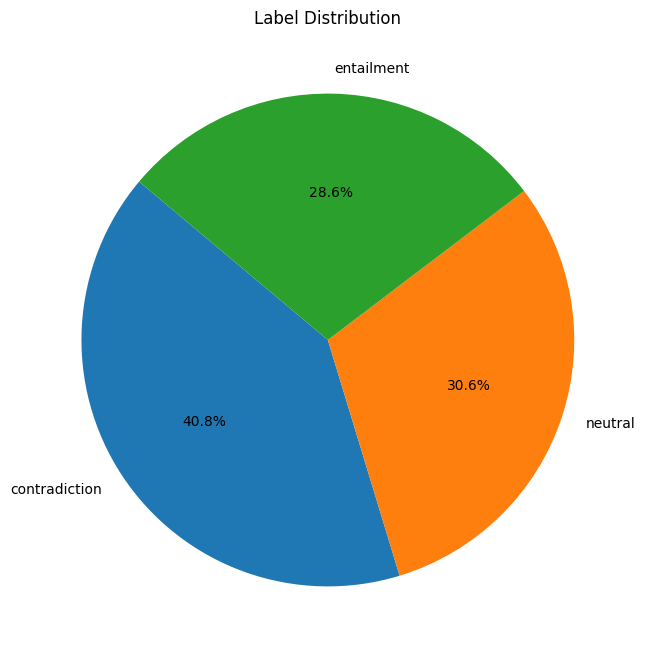

In [41]:
plt.figure(figsize=(8, 8))
plt.pie(data.label.value_counts(), labels=data.label.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution')
plt.show()

In [42]:
data.to_csv("all_topics_enatilment_labled_by_GPT4_with_keyword_abortion.csv")